In [7]:
import numpy as np

# Function to approximate
a = 6 # Last number of your AEM
f = lambda x: x * np. cos(x + a)
# Generate 100 random points with distribution f and noise factor of 1
x = np.random.uniform(0, 10, 100)
y = f(x) + np.random.normal(scale=1, size=100)
X = x[:, np.newaxis]

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVR 

In [9]:
def regression_tree(X_train, y_train, X_test, y_test, max_depth):

    decision_tee_rgr = DecisionTreeRegressor(max_depth=max_depth)
    decision_tee_rgr.fit(X_train, y_train)

    y_pred_rt = decision_tee_rgr.predict(X_test)

    max_depth =str(max_depth)
    label = "max depth="
    label += max_depth
    plt.figure()
    plt.scatter(X_test, y_test, s=20, edgecolor="black", c="darkorange", label=" unknown data")
    plt.plot(X_test, y_pred_rt, color="cornflowerblue", label=label, linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Decision Tree Regression")
    plt.legend()
    plt.show()

    mse = mean_squared_error(y_test, y_pred_rt)
    print(f"Mean Squared Error: {mse:.2f}")

In [10]:
#rbf kernel: K(x_1,x_2)=exp(−γ⋅‖x_1−x_2‖^2)

def svm_regression(X_train, y_train, X_test, y_test, gamma, C):
    svr = SVR(kernel='rbf', gamma=gamma, C=C)
    svr.fit(X_train, y_train)

    y_pred_svr = svr.predict(X_test)

    gamma =str(gamma)
    C =str(C)
    label = "gamma="
    label += gamma
    label += " C="
    label += C
    plt.figure()
    plt.scatter(X_test, y_test, s=20, edgecolor="black", c="darkorange", label=" unknown data")
    plt.plot(X_test, y_pred_svr, color="cornflowerblue", label=label, linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Support Vector Machine for regression")
    plt.legend()
    plt.show()

    mse = mean_squared_error(y_test, y_pred_svr)
    print(f"Mean Squared Error: {mse:.2f}")

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

data_test = np.column_stack((X_test,y_test))
data_test = data_test[data_test[:, 0].argsort()]

X_test=data_test[:, 0]
y_test=data_test[:,1]
X_test=X_test[:, np.newaxis]
y_test=y_test[:, np.newaxis]

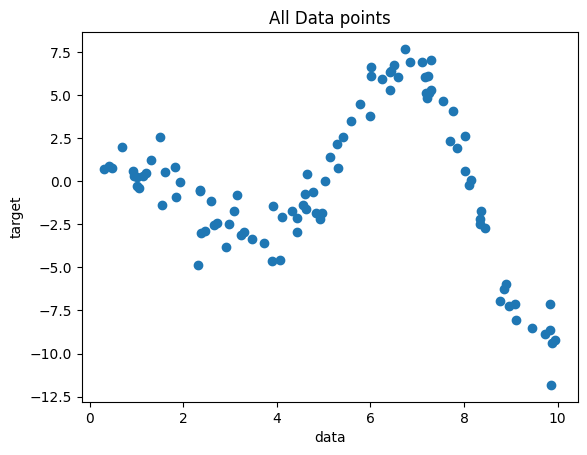

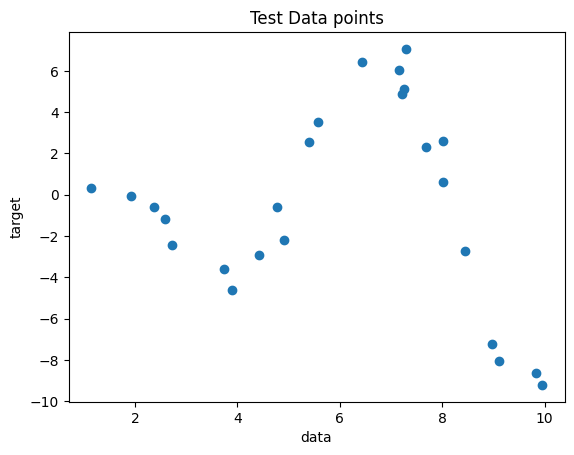

In [12]:
plt.scatter(X, y)
plt.title("All Data points")
plt.xlabel("data")
plt.ylabel("target")
plt.show()

plt.scatter(X_test, y_test)
plt.title("Test Data points")
plt.xlabel("data")
plt.ylabel("target")
plt.show()

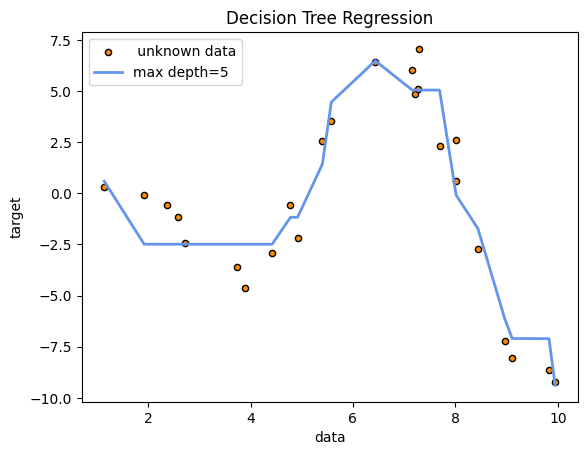

Mean Squared Error: 1.86


In [13]:
#Good fit
regression_tree(X_train, y_train, X_test, y_test, 5)

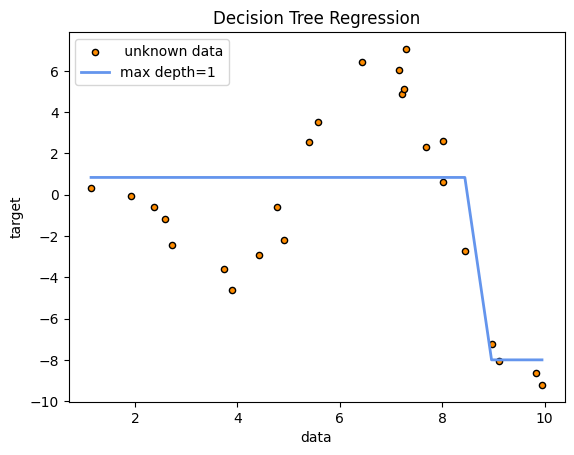

Mean Squared Error: 10.19


In [14]:
#Under fit
regression_tree(X_train, y_train, X_test, y_test, 1)

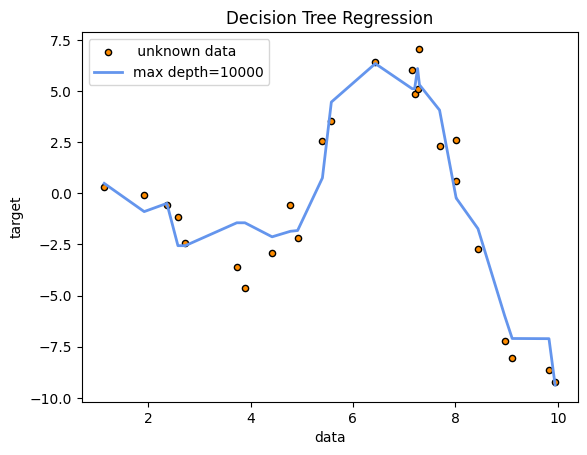

Mean Squared Error: 1.86


In [15]:
#Overfit
regression_tree(X_train, y_train, X_test, y_test, 10000)

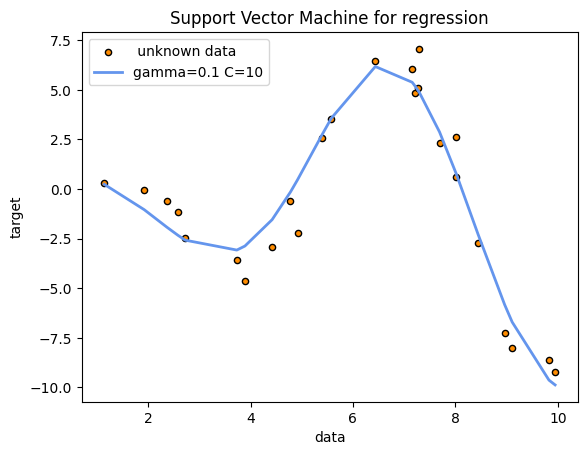

Mean Squared Error: 1.25


In [16]:
#########SVM#########
#Good fit
svm_regression(X_train, y_train, X_test, y_test, 0.1, 10)

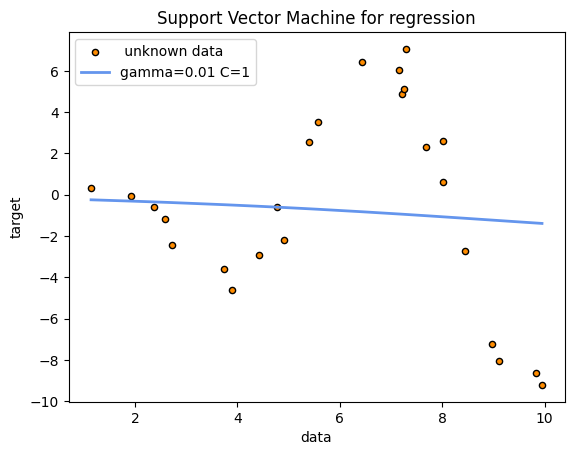

Mean Squared Error: 21.22


In [17]:
#Underfit
svm_regression(X_train, y_train, X_test, y_test, 0.01, 1)

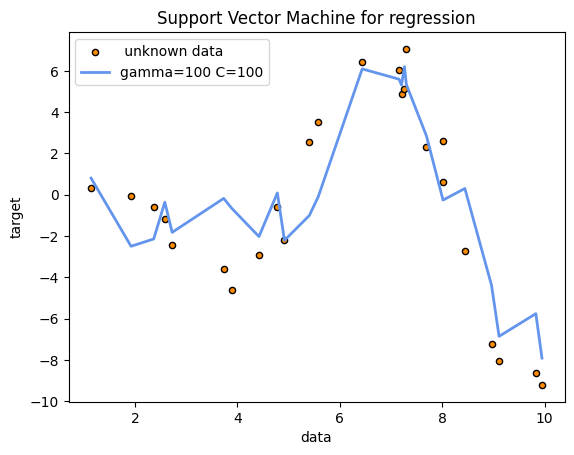

Mean Squared Error: 4.26


In [18]:
#Overfit
svm_regression(X_train, y_train, X_test, y_test, 100, 100)

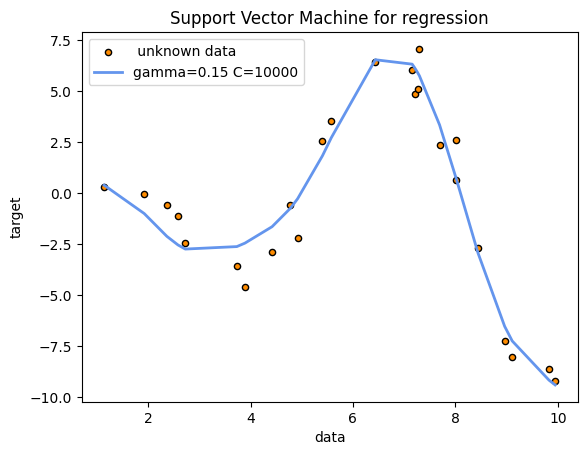

Mean Squared Error: 1.11


In [19]:
svm_regression(X_train, y_train, X_test, y_test, 0.15, 10000)